In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

In [10]:
all_data_df = pd.read_csv("policy_databox/full_data.csv")

/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_12404/1822972037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_data_df["new_cases_cleaned"] = canada_data_df["new_cases"].replace(0, np.nan)
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_12404/1822972037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_data_df["date"] = pd.to_datetime(canada_data_df["date"])
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_12404/1822972037.py:10: DtypeWarning: Columns (8

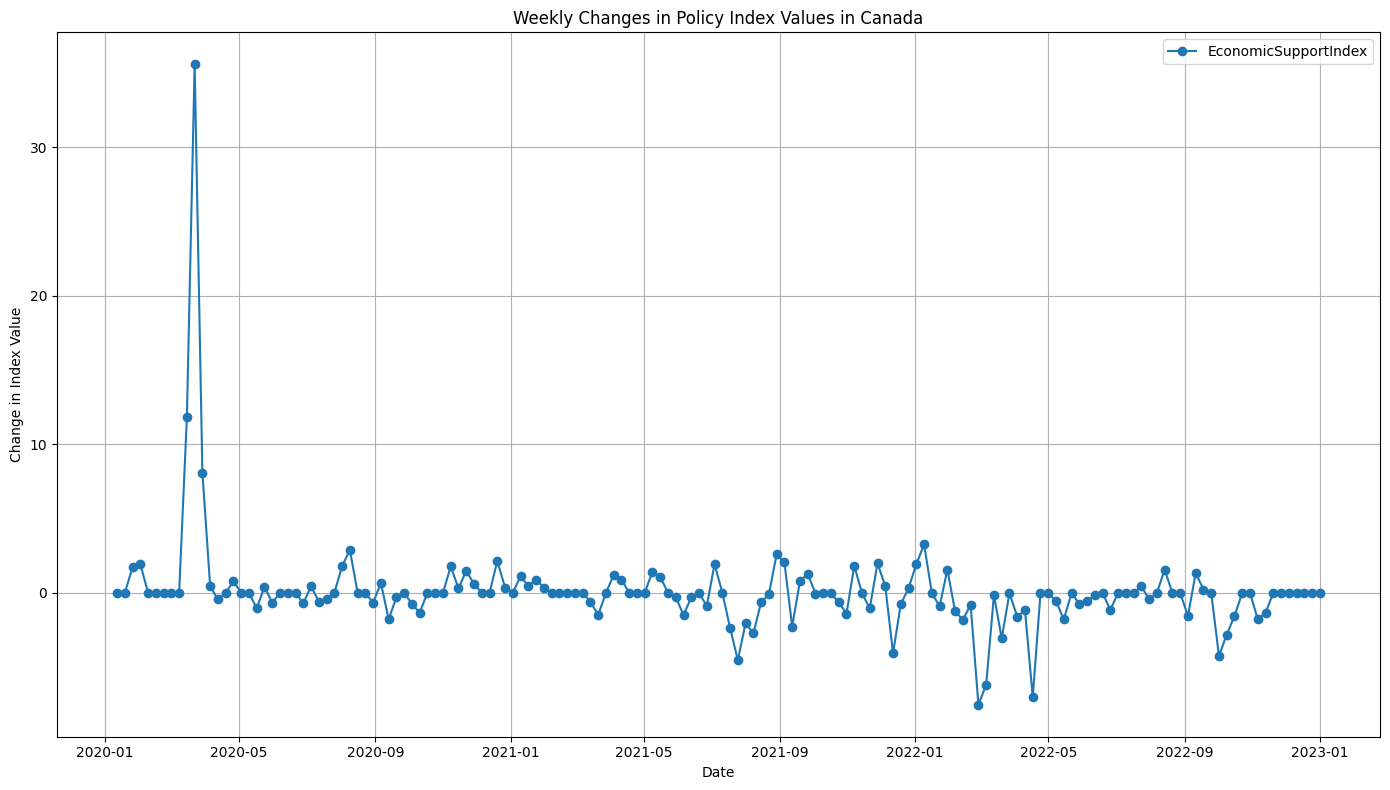

In [11]:
CANADA_POPULATION = 41000000
canada_data_df = all_data_df[all_data_df["location"] == "Canada"]
canada_data_df.reset_index(drop=True, inplace=True)
canada_data_df["new_cases_cleaned"] = canada_data_df["new_cases"].replace(0, np.nan)
canada_data_df["date"] = pd.to_datetime(canada_data_df["date"])
canada_data_df.set_index("date", inplace=True)
weekly_canada_data = canada_data_df["new_cases_cleaned"].resample("W").sum()
weekly_canada_data = weekly_canada_data.reset_index()

canada_policy_df = pd.read_csv("policy_databox/OxCGRT_fullwithnotes_CAN_v1.csv")
canada_policy_df = canada_policy_df[canada_policy_df["Jurisdiction"] == "NAT_TOTAL"]
canada_policy_df["date"] = pd.to_datetime(canada_policy_df["Date"], format="%Y%m%d")
canada_policy_df.reset_index(drop=True, inplace=True)
# Define the list of policy index columns you want to select
policy_index_columns = [
    "C1E_School closing",
    "C2E_Workplace closing",
    "C3E_Cancel public events",
    "C4E_Restrictions on gatherings",
    "C5E_Close public transport",
    "C6E_Stay at home requirements",
    "C7E_Restrictions on internal movement",
    "C8E_International travel controls",
    "E1_Income support",
    "E2_Debt/contract relief",
    "E3_Fiscal measures",
    "E4_International support",
    "H1_Public information campaigns",
    "H2_Testing policy",
    "H3_Contact tracing",
    "H4_Emergency investment in healthcare",
    "H5_Investment in vaccines",
    "H6E_Facial Coverings",
    "H7_Vaccination policy",
    "H8E_Protection of elderly people",
    "V1_Vaccine Prioritisation (summary)",
    "V2A_Vaccine Availability (summary)",
    "V2D_Medically/ clinically vulnerable (Non-elderly)",
    "V2E_Education",
    "V2F_Frontline workers  (non healthcare)",
    "V2G_Frontline workers  (healthcare)",
    "V3_Vaccine Financial Support (summary)",
    "V4_Mandatory Vaccination (summary)",
    "StringencyIndex_WeightedAverage",
    "GovernmentResponseIndex_WeightedAverage",
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
]
# Include the 'date' column for merging or time series analysis
columns_to_select = ["date"] + policy_index_columns
# Select only these columns from the policy DataFrame
canada_policy_df = canada_policy_df[columns_to_select]

canada_policy_weekly = canada_policy_df.set_index("date").resample("W").mean().reset_index()
canada_weekly_merged_df = pd.merge(weekly_canada_data, canada_policy_weekly, on="date")
canada_policy_df.head()

# Calculate weekly changes in policy indices
policy_index_columns = [
    "StringencyIndex_WeightedAverage",
    "GovernmentResponseIndex_WeightedAverage",
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
]

for col in policy_index_columns:
    canada_weekly_merged_df[f"{col}_change"] = canada_weekly_merged_df[col].diff()

# Plot the changes in policy index values
plt.figure(figsize=(14, 8))

plt.plot(
    canada_weekly_merged_df["date"],
    canada_weekly_merged_df["GovernmentResponseIndex_WeightedAverage_change"],
    marker="o",
    linestyle="-",
    label=col,
)

plt.xlabel("Date")
plt.ylabel("Change in Index Value")
plt.title("Weekly Changes in Policy Index Values in Canada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

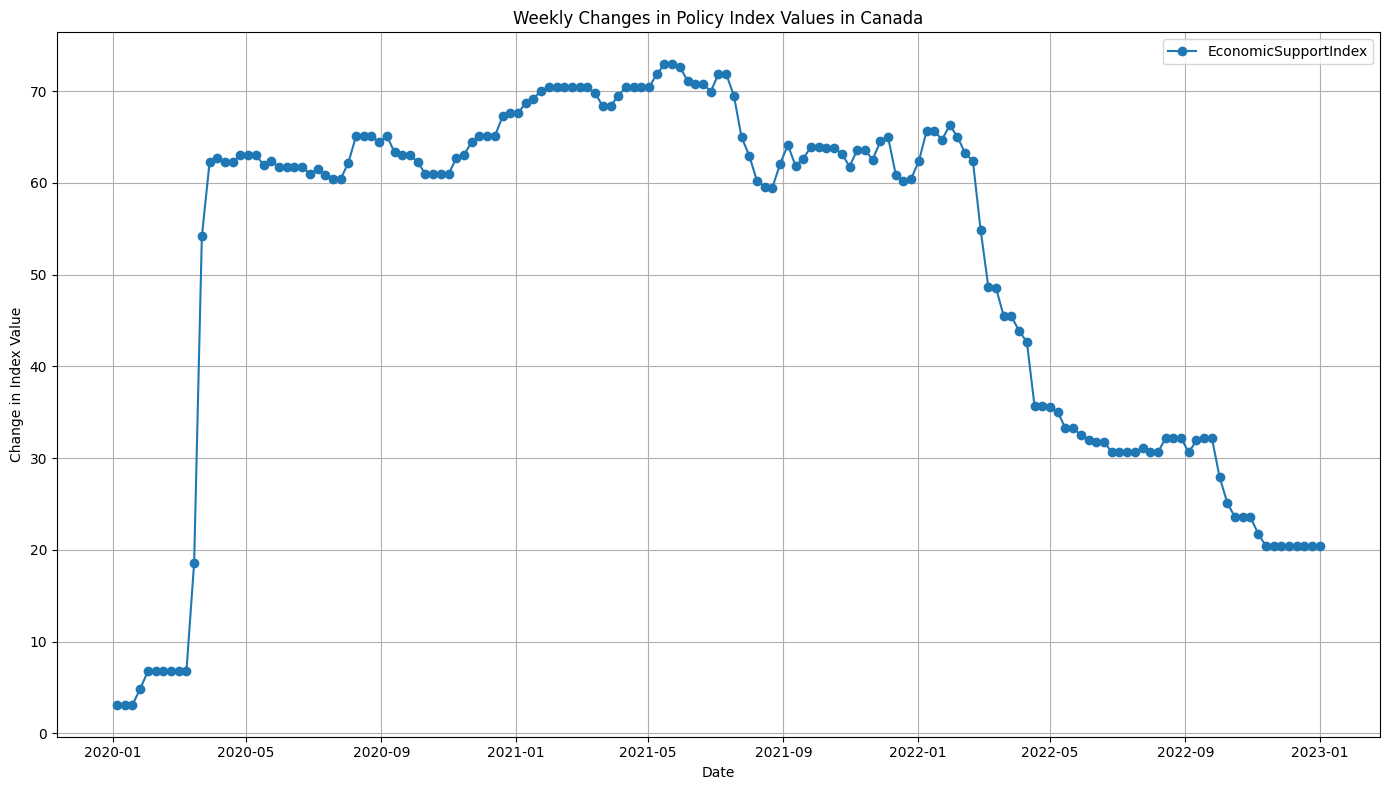

In [12]:
plt.figure(figsize=(14, 8))

plt.plot(
    canada_weekly_merged_df["date"],
    canada_weekly_merged_df["GovernmentResponseIndex_WeightedAverage"],
    marker="o",
    linestyle="-",
    label=col,
)

plt.xlabel("Date")
plt.ylabel("Change in Index Value")
plt.title("Weekly Changes in Policy Index Values in Canada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
US_POPULATION = 346000000
us_data_df = all_data_df[all_data_df["location"] == "United States"]
us_data_df.reset_index(drop=True, inplace=True)
us_data_df["new_cases_cleaned"] = us_data_df["new_cases"].replace(0, np.nan)
us_data_df["date"] = pd.to_datetime(us_data_df["date"])
us_data_df.set_index("date", inplace=True)
us_weekly_data = us_data_df["new_cases_cleaned"].resample("W").sum()
us_weekly_data = us_weekly_data.reset_index()

/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_12404/1384312192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data_df["new_cases_cleaned"] = us_data_df["new_cases"].replace(0, np.nan)
/var/folders/_x/fd6l9rvj0kn9yb1snz2hrmt80000gn/T/ipykernel_12404/1384312192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data_df["date"] = pd.to_datetime(us_data_df["date"])
